# __Checking the data!__

Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

    1. Univariate analysis and summary of the data : This is a simplest type of visualization: single-variable or "univariate" visualizations
    
    “Uni” means “one”, so in other words your data has only one or uses one variable. In this case we shall use "sales_per_day" 
    
   The pandas library is the core library for Python data analysis: the "killer feature" that makes the entire ecosystem stick together. However, it can do more than load and transform your data: it can visualize it too! (Cited: kaggle.com)
    
    
    2. Multivariate analysis and summary of the data
    3. Checking for outliers
    4. Identifying the missing data code
    
We shall use distribution ploting.

we draw this using seaborn as sns, Facetgrid gives grid layout, Cancer_sur is variable that we loaded data into.Hue colors the value/columnname that you give to it. Size is graph size and mapping all these to sns.distplot on “sales_per_day” column. (Cited: p.,gudikandula)

## __Univariate analysis and summary of the data__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';', index_col=0)
mydf.head(3)

,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
brand,,,,,,,
MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83


In [2]:
#descriptive analysis of each variable using a Tuple
mydf.describe().T

,count,mean,std,min,25%,50%,75%,max
customers_per_day,18199.0,259.351503,26758.789881,-999999.0,327.00,550.00,1605.00,4734.00
outlet_id,18194.0,-301.265747,24590.138649,-999999.0,97.00,255.00,530.00,698.00
week_id,18194.0,-852.575684,29643.403749,-999999.0,14.00,27.00,40.00,52.00
sales_per_day,18193.0,50823.378059,31283.133925,-999999.0,51260.45,57319.92,63163.58,96225.53


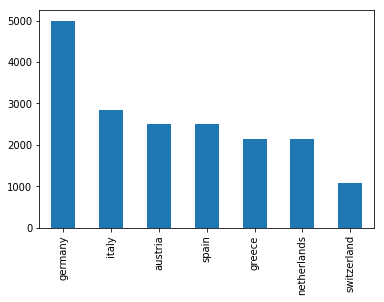

In [3]:
mydf['country'].value_counts().head(10).plot.bar()

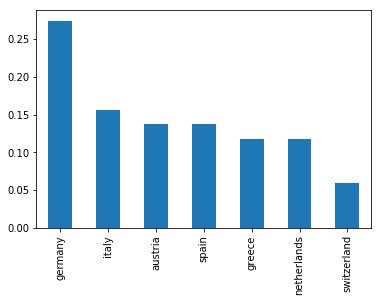

In [4]:
(mydf['country'].value_counts().head(10) / len(mydf)).plot.bar()
#This tells us the Germany has more sales per day

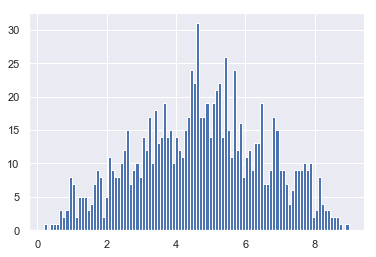

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
x = plt.hist(np.random.triangular(0, 5, 9, 1000), bins=100, linewidth=1)
plt.show()

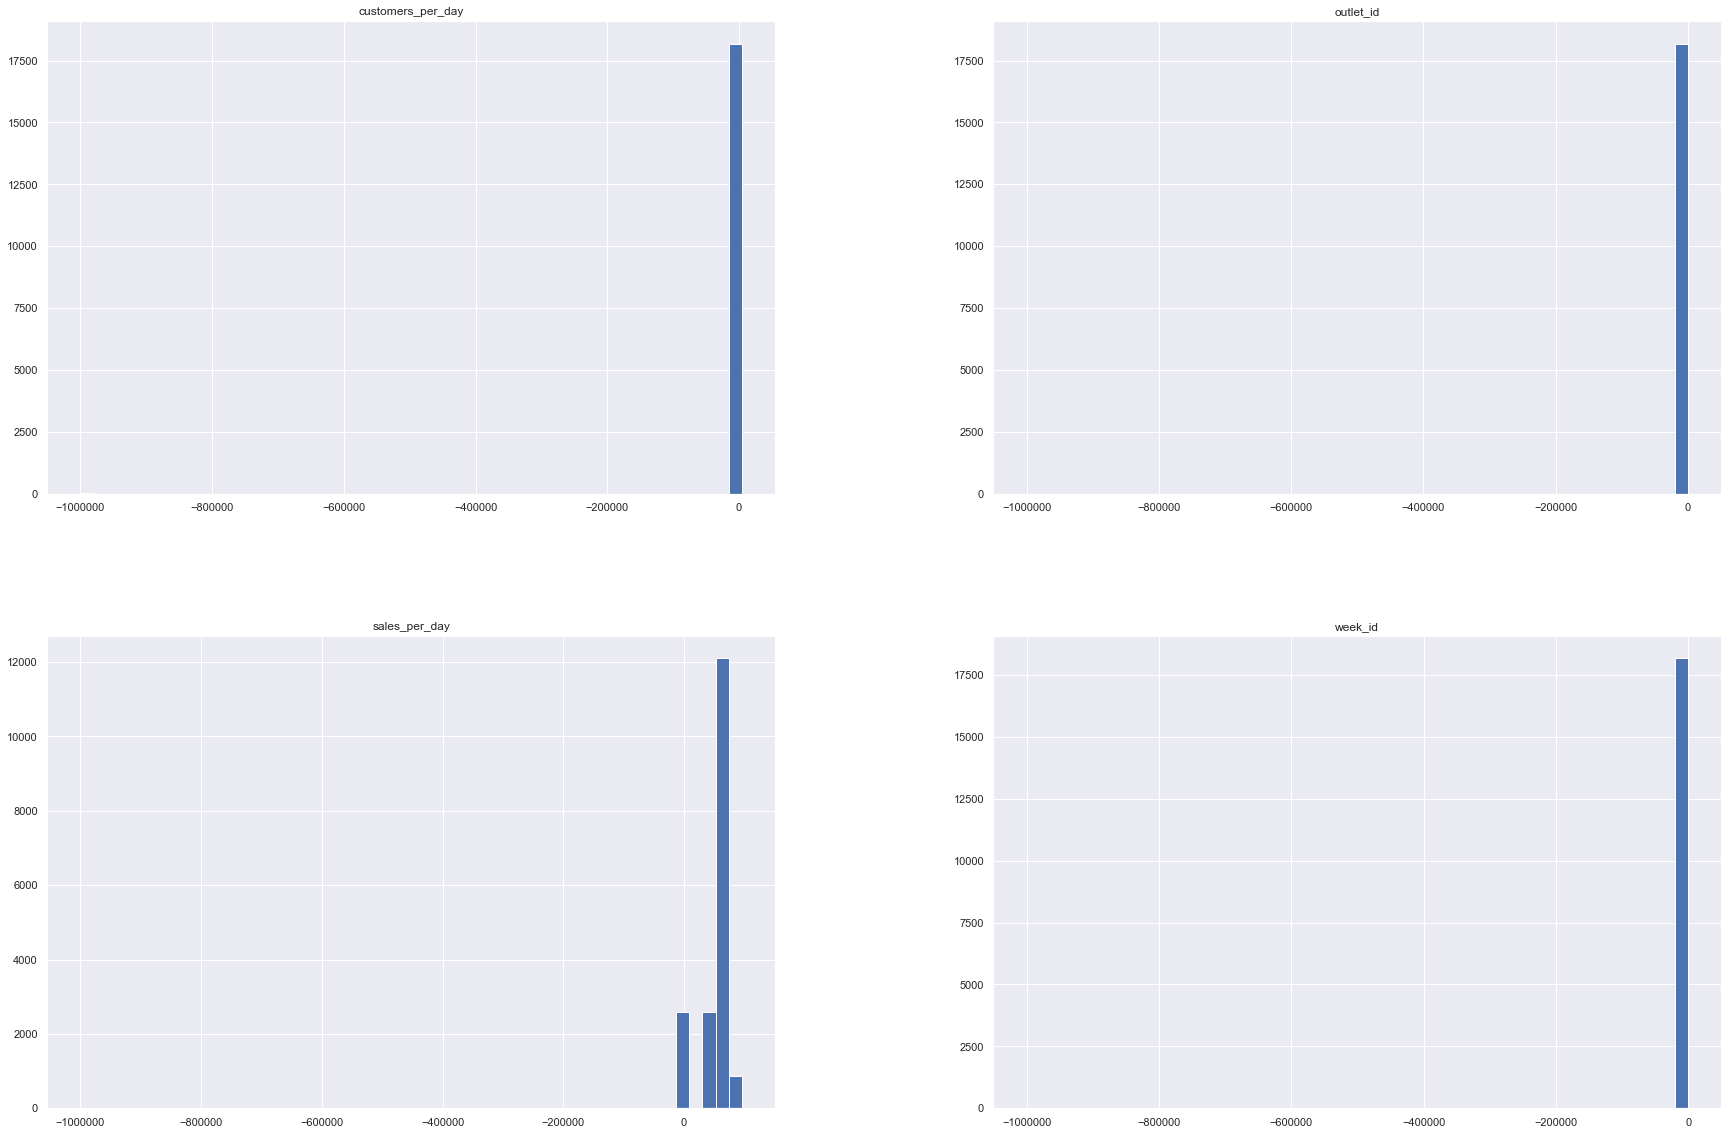

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';', index_col=0)

mydf.hist(bins=50, figsize=(30,20));

## Multivariate analysis and summary of the data
    
    Using more than one variable for data summary
    deriving colleration matrix
    
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation: (Cited: statisticshowto.datasciencecentral.com)

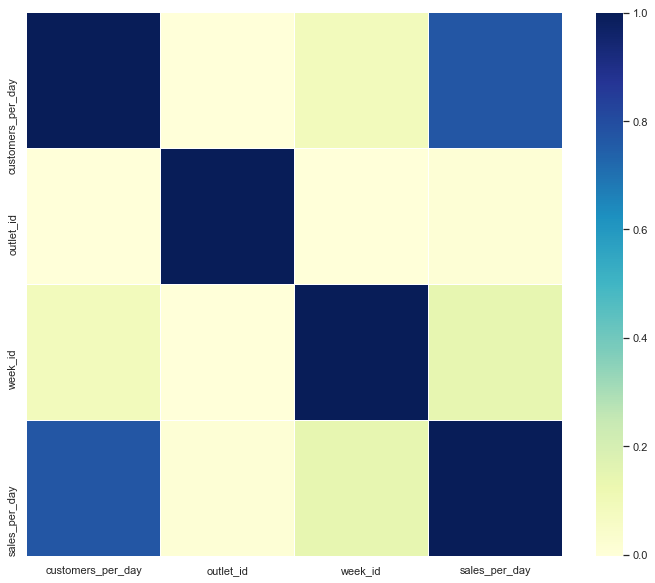

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';', index_col=0)
corrmat = mydf.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

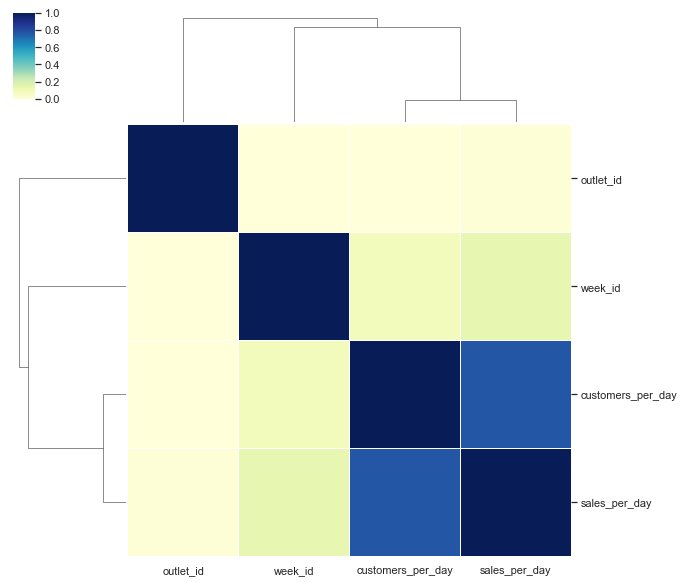

In [8]:
corrmat = mydf.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

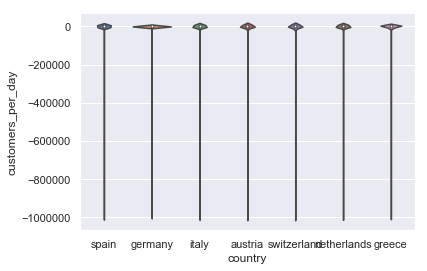

In [9]:
#Violin ploting
sns.violinplot(x="country", y="customers_per_day", data=mydf, height=2)

/Users/robert/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/robert/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


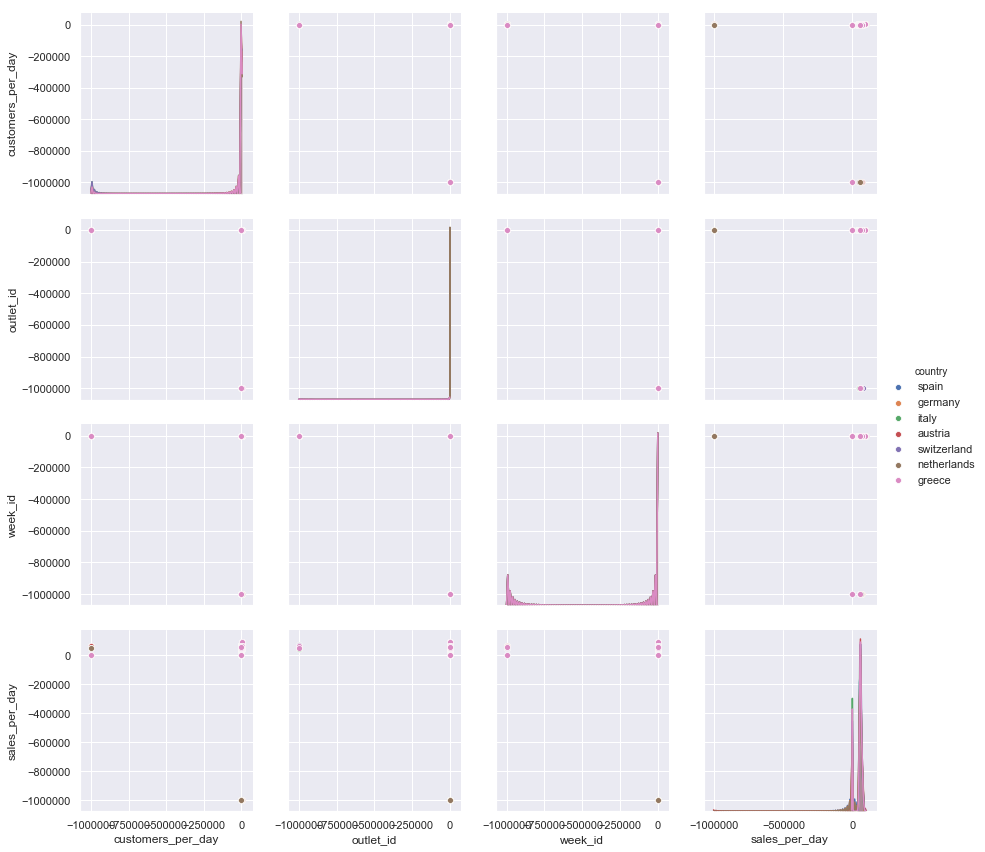

In [10]:
#Pair plot
sns.pairplot(mydf, hue="country", height=3)
plt.show()

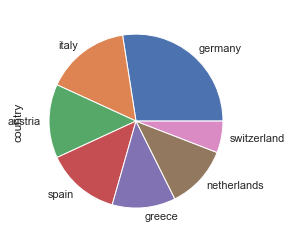

In [11]:
mydf['country'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

## Checking for outliers

    An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset. (Cited: R..,Khandelwal, Sep.2018)
    
    An outlier could exist in a dataset due to
    1. Variability in the data
    2. An experimental measurement error
    3. What is the impact of an outlier?

    Causes serious issues for statistical analysis
    1. skew the data,
    2. significant impact on mean
    3. significant impact on standard deviation.
    
    How can we identify an outlier?
    1. using scatter plots
    2. using Z score
    3. using the IQR interquartile range
    
    Using Z score

    Formula for Z score = (Observation — Mean)/Standard Deviation
    z = (X — μ) / σ